In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/jaishreejoshita/Desktop/Nat_Gas.csv")
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [3]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)
df

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


In [4]:
my_order = (1,1,1)
my_seasonal_order = (1,1,1,12)

In [5]:
model = sm.tsa.SARIMAX(df['Prices'], order=my_order, seasonal_order = my_seasonal_order)
model_fit = model.fit()

/Users/rohitkumawat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/rohitkumawat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/rohitkumawat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54046D-01    |proj g|=  3.48174D-01

At iterate    5    f=  2.66181D-02    |proj g|=  7.22397D-02

At iterate   10    f=  1.45920D-02    |proj g|=  3.24898D-02

At iterate   15    f=  1.34953D-02    |proj g|=  1.50054D-02

At iterate   20    f=  1.33797D-02    |proj g|=  1.18109D-02

At iterate   25    f=  1.33563D-02    |proj g|=  3.64909D-03

At iterate   30    f=  1.33523D-02    |proj g|=  9.70629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [6]:
predicted_data = model_fit.predict(start=len(df), end=len(df)+12)
predicted_data

2024-10-31    11.987291
2024-11-30    12.610167
2024-12-31    12.925068
2025-01-31    13.064811
2025-02-28    13.012384
2025-03-31    13.044056
2025-04-30    12.439673
2025-05-31    12.121573
2025-06-30    11.987337
2025-07-31    12.212193
2025-08-31    12.132091
2025-09-30    12.378545
2025-10-31    12.566625
Freq: M, Name: predicted_mean, dtype: float64

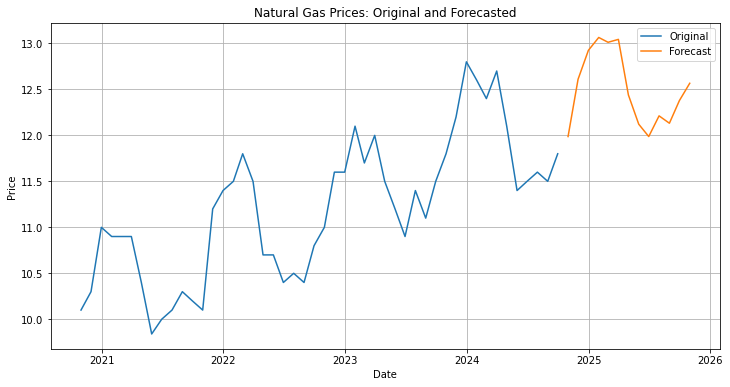

In [7]:
forecast_df = pd.DataFrame({'Forecast':predicted_data})

# Plot the original and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Original')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Natural Gas Prices: Original and Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()